# Homework - Filter design for DTMF detection
Filters with Python based on tutorial: [Designing an FIR filter in Python](http://www.ee.iitm.ac.in/~nitin/teaching/ee5480/firdesign.html)

In [171]:
# Import functions to keep it simple to use
from pylab import * 
import matplotlib.pyplot as plt
import numpy as np

## Parâmetros gerais

In [266]:
fs = 44100            # sampling frequency [Hz]
Ts = 1.0/fs           # sampling period [s]
noise_amp = 1         # noise amplitude 

signal_length = 10
# time steps: 1 second of data samples at spacing of 1/1000 seconds
#t = arange(0, 1, Ts)
t = np.linspace(0, 1, fs, endpoint=False)


## Sinal de entrada
Começar com uma senoide básica em 7 kHz com ruídos.

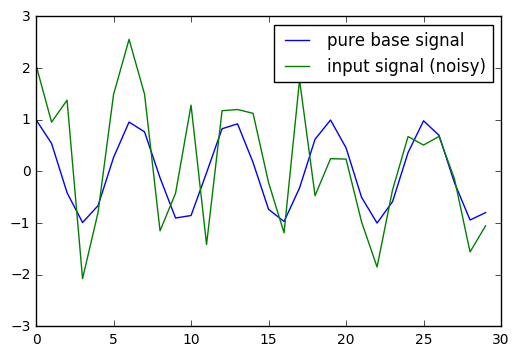

In [267]:
s_pure = cos(2*pi*7000*t)
s = s_pure + noise_amp*randn(len(t))

plt.plot(s_pure[:30])
plt.plot(s[:30])
plt.legend(('pure base signal', 'input signal (noisy)'), loc='best')
plt.show()

In [268]:
# low and high frequencies from DTMF standard
#lf = np.array([697, 770, 852, 941])
#hf = np.array([1209, 1336, 1477, 1633])

# make matrix/data structure to hold combination of frequencies to be used later

# create input signals mixing the combinations
#s1 = cos(2*pi*697*t)
#s2 = cos(2*pi*1209*t)

#s3 = s1+s2

# test some filters to extract those

# yo


## Visualização do sinal de entrada na frequência 

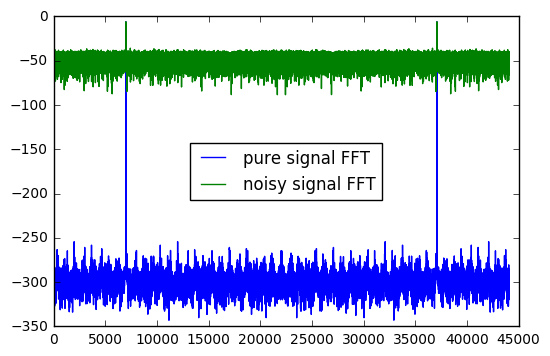

In [269]:
ft_pure = fft(s_pure)/len(s_pure)
ft = fft(s)/len(s)

plt.plot(20*log10(abs(ft_pure)))
plt.plot(20*log10(abs(ft)))
plt.legend(('pure signal FFT', 'noisy signal FFT'), loc='best')
plt.show()

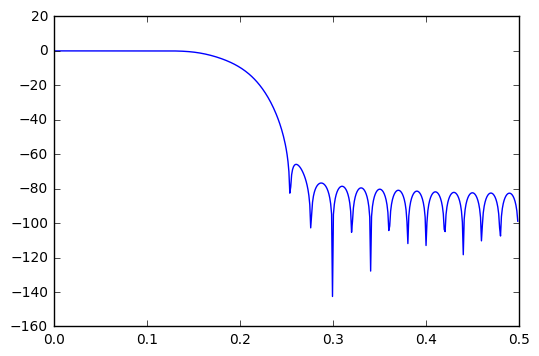

In [270]:
# filter design FIR window 2 algorithm
from scipy.signal import firwin2
lpf2 = firwin2(50, [0.0, 0.3, 0.45, 1.0], [1.0, 1.0, 0.0, 0.0], window='hamming') # cutoff is a fraction of Nyquist frequency

from scipy.signal import freqz
w, h = freqz(lpf2)

plt.plot(w/(2*pi), 20*log10(abs(h)))
plt.show()

## Chooses filter

In [271]:
#lpf = lpf1
lpf = lpf2

## Antialiasing filtering with `filtfilt`

In [272]:
# filtering the signal with lfilter
from scipy.signal import filtfilt
s1 = filtfilt(lpf, 1, s)

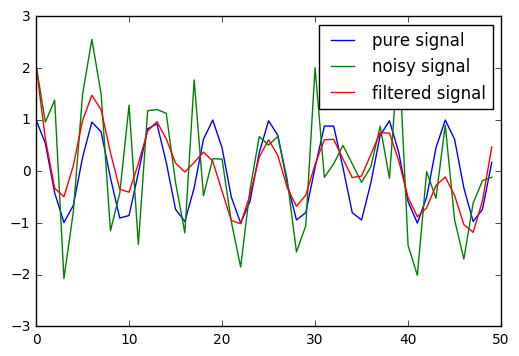

In [273]:
#plotting in time
plt.plot(s_pure[:50])
plt.plot(s[:50])
plt.plot(s1[:50])
legend(('pure signal', 'noisy signal', 'filtered signal'), loc='best')
plt.show()

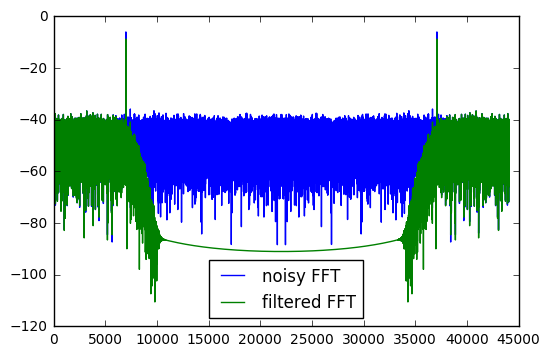

In [274]:
# plotting in frequency

ft = fft(s)/len(s)
ft1 = fft(s1)/len(s1)

plt.plot(20*log10(abs(ft)))
plt.plot(20*log10(abs(ft1)))
legend(('noisy FFT', 'filtered FFT'), loc='best')
plt.show()

In [275]:
from scipy.signal import decimate

f = decimate(s1, 6, 150, 'fir', zero_phase=True)

In [276]:
fs_down = 44100/6             # sampling frequency [Hz]
t_down = np.linspace(0, 1, fs_down, endpoint=False)

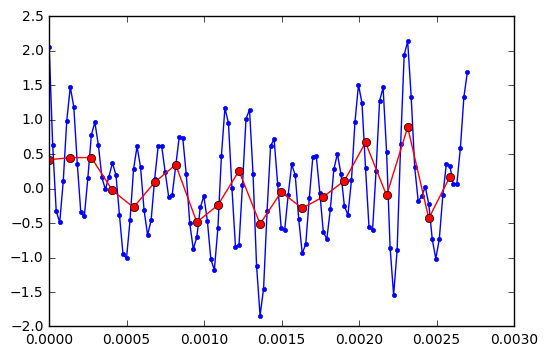

In [277]:
plt.plot(t[0:120], s1[0:120], 'b.-', t_down[0:20], f[0:20], 'ro-')#, 0.01, s1[0], 'ro')
#plt.legend(['data', 'resampled'], loc='best')
#plt.plot(s1[:50])
#plt.plot(f[:50])
plt.show()

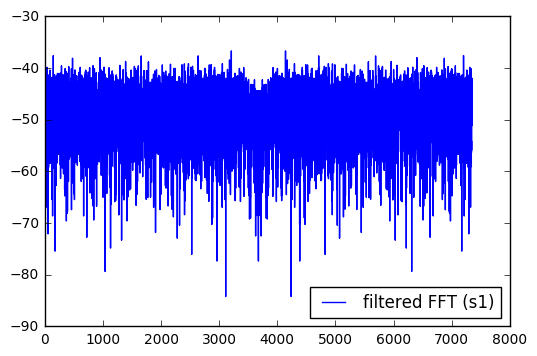

In [278]:
# plotting in frequency

#ft1 = fft(s1)/len(s1) # obs.: already calculated previously in the code
ft2 = fft(f)/len(f)

#plt.plot(20*log10(abs(ft1)))
plt.plot(20*log10(abs(ft2)))
legend(('filtered FFT (s1)', 'decimated FFT (f)'), loc='best')
plt.show()

## Extra code

## Filtering with `filtfilt`
Linear phase, without delay.

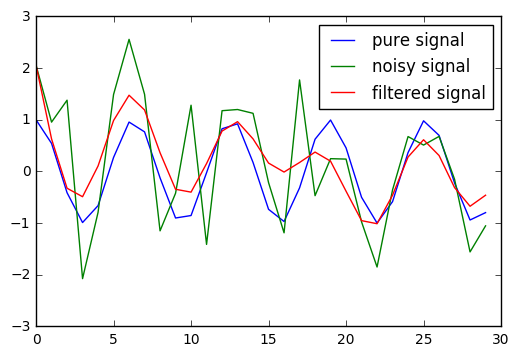

In [279]:
# filtering the signal with filtfilt
from scipy.signal import filtfilt

s1 = filtfilt(lpf, 1, s)

plt.plot(s_pure[:30])
plt.plot(s[:30])
plt.plot(s1[:30])
legend(('pure signal', 'noisy signal', 'filtered signal'), loc='best')
plt.show()

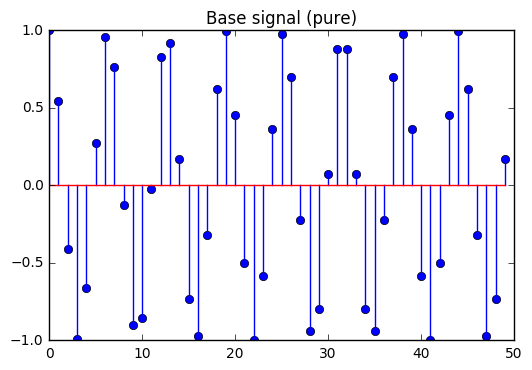

In [280]:
plt.stem(s_pure[:50])
plt.title('Base signal (pure)')
plt.show()

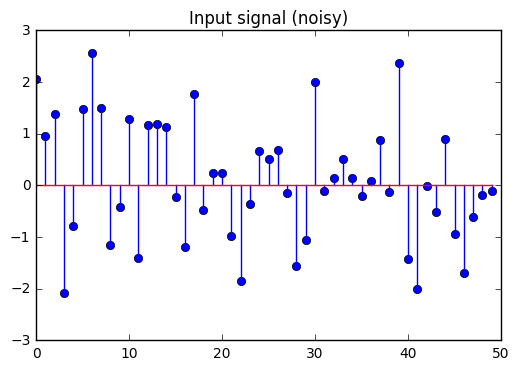

In [281]:
plt.stem(s[:50])
plt.title('Input signal (noisy)')
plt.show()

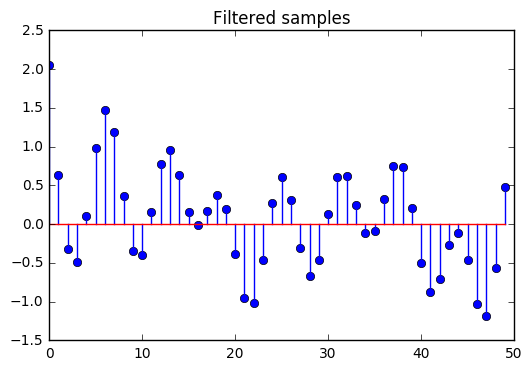

In [282]:
plt.stem(s1[:50])
plt.title('Filtered samples')
plt.show()

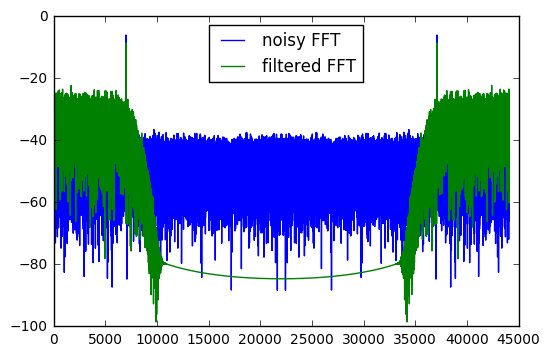

In [283]:
ft = fft(s)/len(s)
ftout = fft(sout)/len(sout)

plt.plot(20*log10(abs(ft)))
plt.plot(20*log10(abs(ftout)))
legend(('noisy FFT', 'filtered FFT'), loc='best')
plt.show()

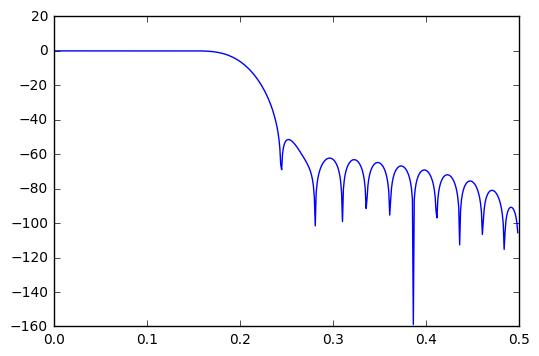

In [284]:
# filter design FIR window algorithm
from scipy.signal import firwin
lpf1 = firwin(numtaps=40, cutoff=0.4, window='hamming') # cutoff is a fraction of Nyquist frequency

from scipy.signal import freqz
w, h = freqz(lpf1)

plt.plot(w/(2*pi), 20*log10(abs(h)))
plt.show()